# 4.3 - Evaluación

### Silhoutte Score

$$S=\frac{b(v)-a(v)}{max(a,b)}$$

donde:

+ v:= vector de datos
+ a(v):=distancia media desde v al resto de vectores del mismo cluster
+ b(v):=distancia media desde v a los vectores del cluster más cercano



S pertenece al intervalo [-1,1], de tal manera que:

+ S=1  => buena clusterizacion
+ S=0  => overlapping
+ S=-1 => mala clusterizacion

In [1]:
from sklearn import cluster, datasets

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D


import numpy as np

In [2]:
X,y=datasets.make_moons(n_samples=1500, noise=.05)

In [3]:
X=StandardScaler().fit_transform(X)

In [4]:
single=cluster.AgglomerativeClustering(n_clusters=2, linkage='single')
single.fit(X)

y1_pred=single.labels_

In [5]:
kmeans=cluster.KMeans(n_clusters=2)
kmeans.fit(X)

y2_pred=kmeans.predict(X)

/opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**plots**

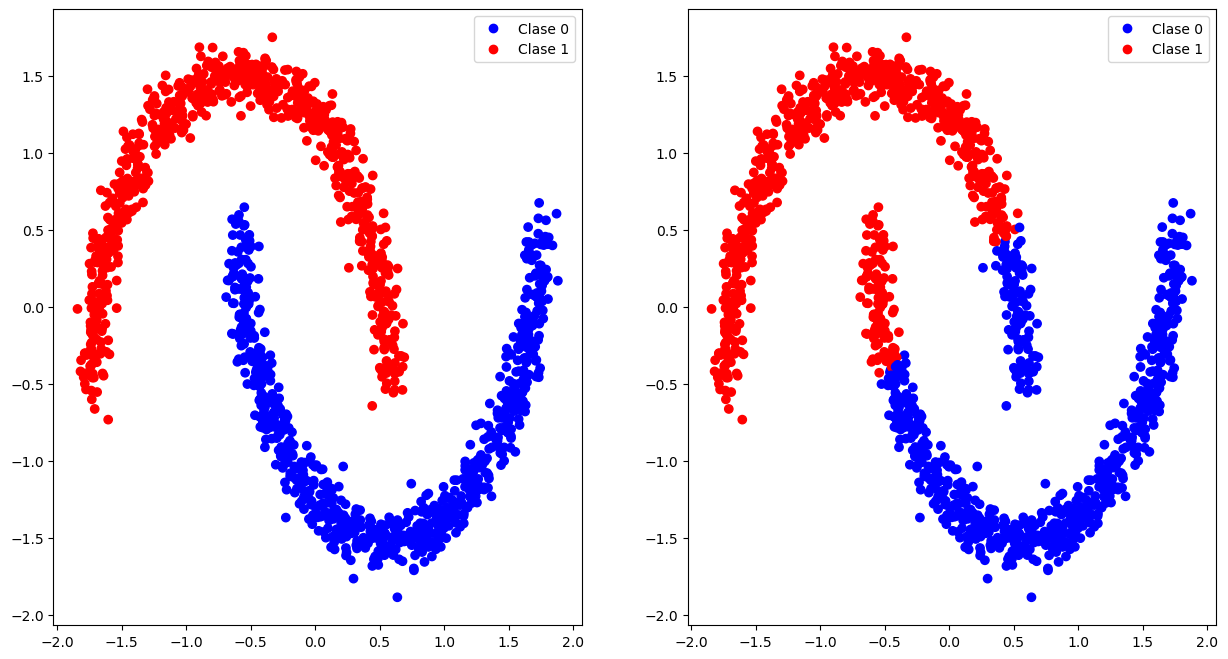

In [6]:
fig,ax = plt.subplots(1, 2, figsize=(15, 8))

colors=np.array(['blue', 'red'])

legend_e=[Line2D([0],[0], color=c, marker='o', linestyle='',
                 label='Clase {}'.format(i))  for i,c in enumerate(colors)]


ax[0].scatter(X[:,0], X[:, 1], color=colors[y1_pred])
ax[0].legend(handles=legend_e, loc='upper right')


ax[1].scatter(X[:,0], X[:, 1], color=colors[y2_pred])
ax[1].legend(handles=legend_e, loc='upper right');

In [7]:
from sklearn.metrics import silhouette_score

In [8]:
silhouette_score(X, y1_pred)

0.39265585451895746

In [9]:
print ('Modelo 1 - Hierarchical : Silhouette Score:{}'.format(silhouette_score(X, y1_pred)))
print ('Modelo 2 - KMeans       : Silhouette Score:{}'.format(silhouette_score(X, y2_pred)))

Modelo 1 - Hierarchical : Silhouette Score:0.39265585451895746
Modelo 2 - KMeans       : Silhouette Score:0.49825161627647824


In [10]:
from sklearn.metrics import silhouette_samples


silhouette_samples(X, y1_pred)[:10]

array([0.49346782, 0.60713322, 0.5218416 , 0.60801227, 0.07583115,
       0.55961311, 0.60153433, 0.51038015, 0.3570327 , 0.41943491])

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

# Elbow

**nº óptimo de clusters**


![elbow](images/elbow.png)

$$WSS=Inercia=\sum_{i=0}^{n} min(|x_i - \bar{x}|^{2})$$

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
X,y=datasets.make_blobs(n_features=3, centers=2)

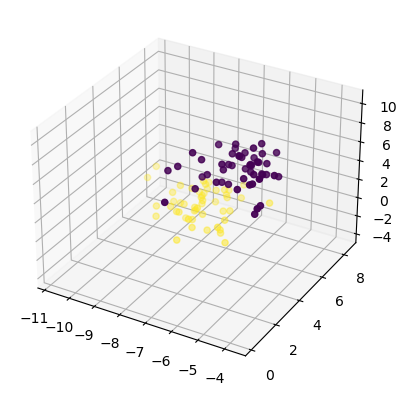

In [12]:
fig=plt.figure()

ax=fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], X[:,2], c=y);

In [19]:
cluster.KMeans(n_clusters=4).fit(X).inertia_

180.60493520863866

In [20]:
[cluster.KMeans(n_clusters=i+1).fit(X).inertia_ for i in range(10)]

[3401.156246247313,
 258.32933893574295,
 219.2000934092628,
 178.81265142628013,
 155.97037379965758,
 135.80716897091008,
 122.72809979267495,
 112.70313674100811,
 105.7968863750985,
 93.31952151263614]

In [21]:
n_clusters, inercia = zip(*[(k, cluster.KMeans(n_clusters=k).fit(X).inertia_) for k in range(1, 10)])

In [22]:
n_clusters, inercia

((1, 2, 3, 4, 5, 6, 7, 8, 9),
 (3401.156246247313,
  258.32933893574295,
  217.69547949528206,
  178.83299138260134,
  155.97037379965758,
  139.986891814462,
  124.51449387801415,
  109.20670298067475,
  103.60461814728959))

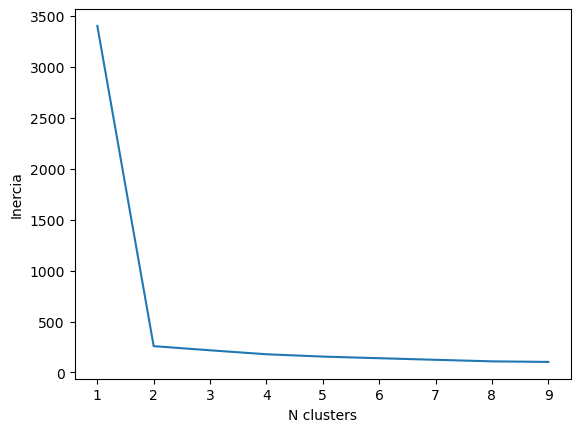

In [23]:
fig=plt.figure()

ax=fig.add_subplot()

ax.plot(n_clusters, inercia)

plt.xlabel('N clusters')
plt.ylabel('Inercia');

In [ ]:
%pip install yellowbrick

In [24]:
from yellowbrick.cluster import KElbowVisualizer

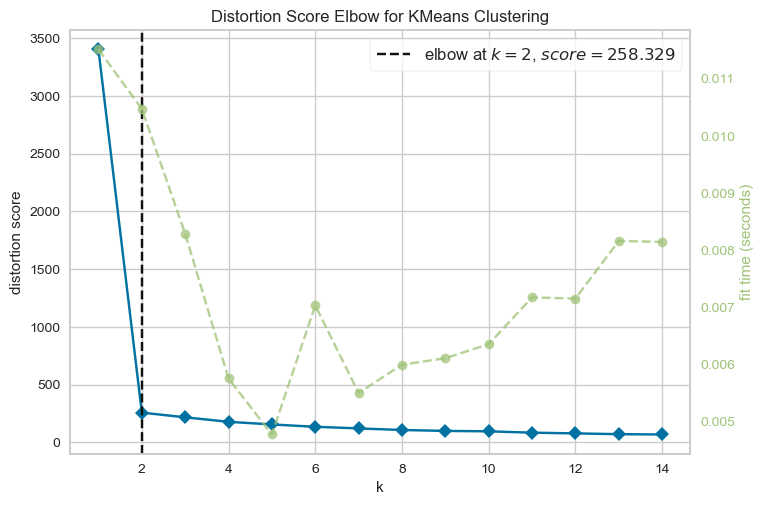

In [25]:
modelo=cluster.KMeans()

visual=KElbowVisualizer(modelo, k=(1, 15))

visual.fit(X)

visual.poof();

In [26]:
X,y=datasets.make_moons(n_samples=1500, noise=.05)
X=StandardScaler().fit_transform(X)

In [27]:
inercias=[]

for i in range(1, 10):
    
    kmeans=cluster.KMeans(n_clusters=i).fit(X)
    
    inercias.append(kmeans.inertia_)

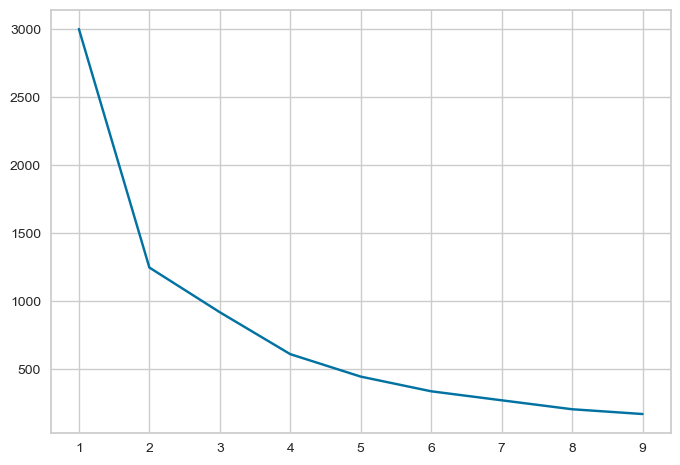

In [28]:
plt.plot(range(1, 10), inercias);

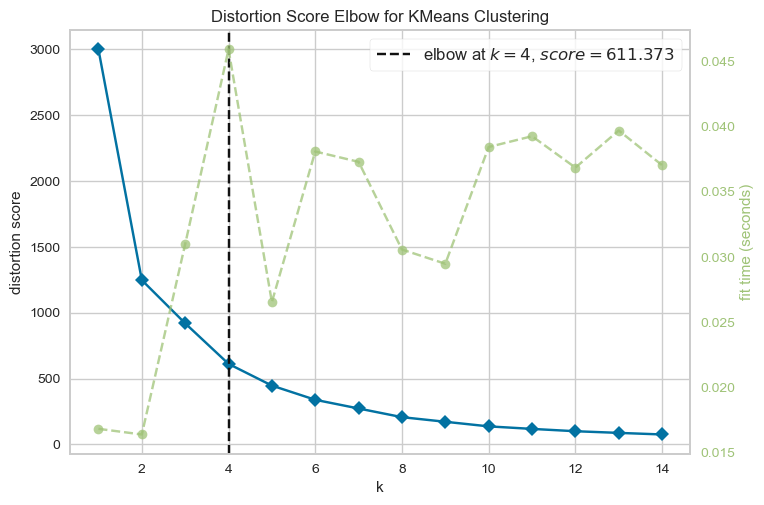

In [29]:
visual=KElbowVisualizer(modelo, k=(1, 15))
visual.fit(X)

visual.poof();

# Rand Score

$$R=\frac{(a+b)}{(a+b+c+d)}$$


pertece al intervalo [0,1]

Sea  S={ s_1, $\ldots{}$, s_n }; X={ x_1, $\ldots{}$, x_n } partición de S e Y={ y_1, $\ldots{}$, y_n } partición de S, entonces:

+ a:=nº de pares de elementos en S que están en el mismo subconjunto de X e Y
+ b:=nº de pares de elementos en S que están en diferentes subconjuntos de X e Y
+ c:=nº de pares de elementos en S que están en el mismo subconjunto de X y en diferente subconjunto de Y
+ d:=nº de pares de elementos en S que están en diferente subconjunto de X y en el mismo subconjunto de Y



Intuitivamente, _a+b_ es la correspondencia entre X e Y, c+d es la discordancia.


https://es.wikipedia.org/wiki/Partici%C3%B3n_de_un_conjunto

http://i3campus.co/CONTENIDOS/wikipedia/content/a/partici%25c3%25b3n_(matem%25c3%25a1tica).html#:~:text=En%20matem%C3%A1ticas%2C%20una%20partici%C3%B3n%20de,en%20subconjuntos%20disjuntos%20no%20vac%C3%ADos.

**Adjusted Rand Score**


$$AR=\frac{R - ExpectedR}{max(R) - ExpectedR}$$

In [30]:
X,y=datasets.make_moons(n_samples=1500, noise=.05)
X=StandardScaler().fit_transform(X)

In [31]:
single=cluster.AgglomerativeClustering(n_clusters=2, linkage='single')
single.fit(X)

y1_pred=single.labels_

In [32]:
kmeans=cluster.KMeans(n_clusters=2)
kmeans.fit(X)

y2_pred=kmeans.predict(X)

In [33]:
from sklearn.metrics import adjusted_rand_score as ars

In [34]:
ars(y, y1_pred)      # jerarquico

1.0

In [35]:
ars(y, y2_pred)      # kmeans

0.48221635901828647

# Visualización de Clusters

In [36]:
X, _= datasets.make_blobs(n_samples=1500, centers=4, cluster_std=1.5)

In [40]:
X.shape

(1500, 2)

In [37]:
kmeans=cluster.KMeans(n_clusters=4).fit(X)

In [38]:
y_pred=kmeans.predict(X)

y_pred[:10]

array([1, 3, 0, 3, 0, 2, 1, 1, 0, 3], dtype=int32)

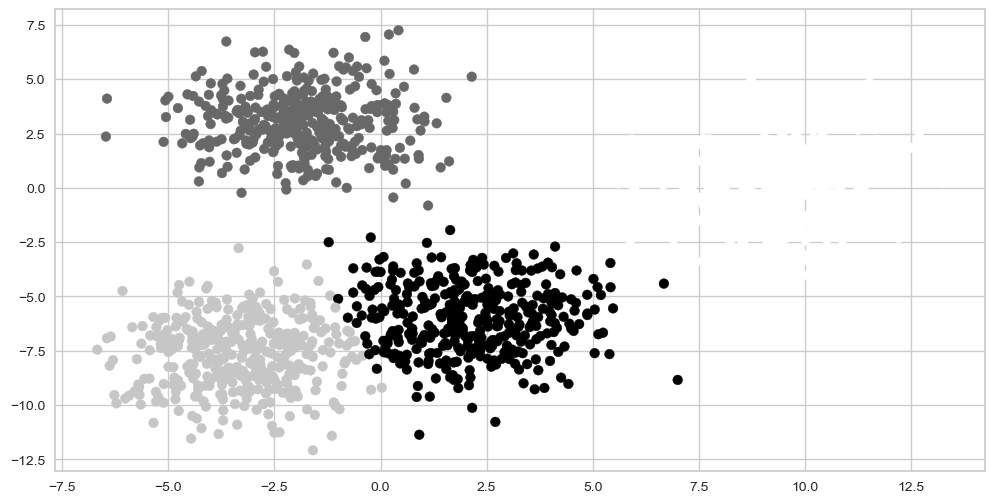

In [39]:
plt.figure(figsize=(12,6))

plt.scatter(X[:,0], X[:,1], 
            c=y_pred);

In [41]:
centers=kmeans.cluster_centers_

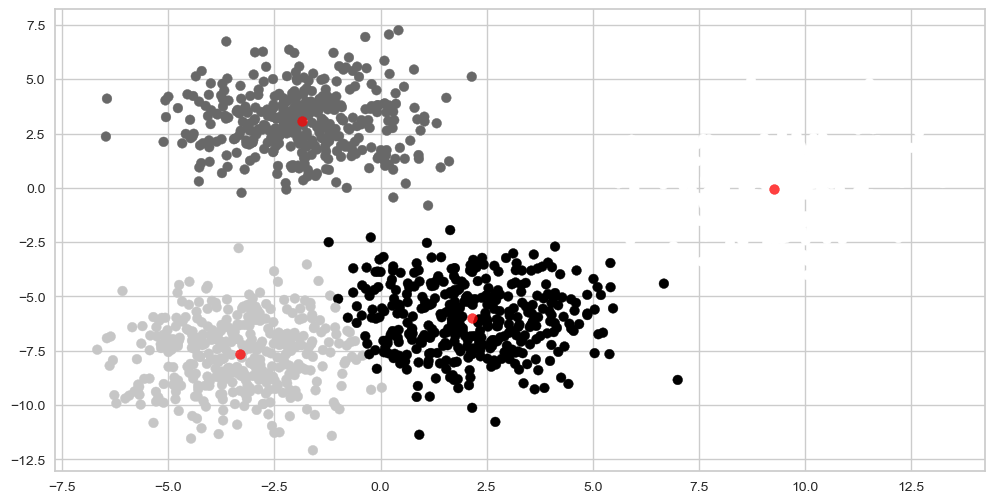

In [42]:
plt.figure(figsize=(12,6))
plt.scatter(X[:,0], X[:,1], c=y_pred)

plt.scatter(centers[:,0], centers[:,1], c='red', s=50, alpha=0.75);

**otro plot en 3D**

In [43]:
from scipy.spatial.transform import Rotation as R

In [57]:
X, _= datasets.make_blobs(n_samples=1500, centers=4, cluster_std=1.)

X=np.c_[X, 0.5*np.random.randn(X.shape[0], 1)]

rot=R.from_euler('y', 45, degrees=True)

X=rot.apply(X)

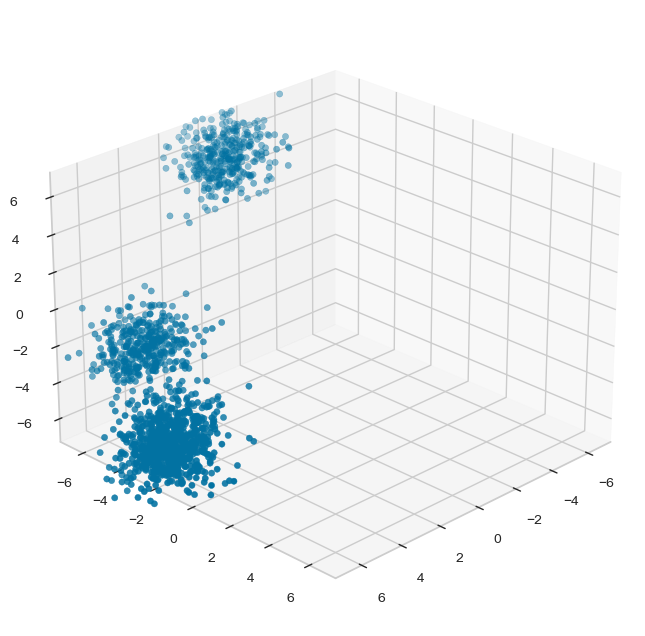

In [58]:
fig=plt.figure(figsize=(12, 8))

ax=fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0],X[:,1],X[:,2])
ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)
ax.set_zlim(-7, 7)
ax.view_init(elev=25, azim=45)
plt.show();

**reduccion de dimensiones-viz**

In [59]:
from sklearn.decomposition import PCA

In [60]:
X.shape

(1500, 3)

In [61]:
pca=PCA().fit(X)

pca_x=pca.transform(X)

pca_x.shape

(1500, 3)

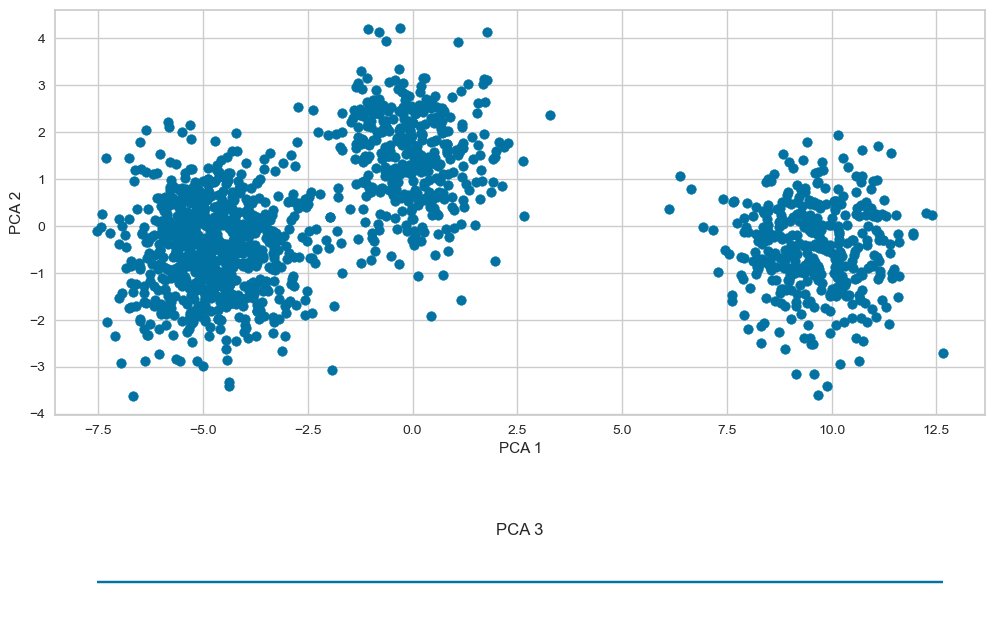

In [62]:
fig=plt.figure(figsize=(12, 8))

ax=[plt.subplot2grid((6, 1), (0, 0), rowspan=4),
    plt.subplot2grid((6, 1), (5, 0))]

ax[0].scatter(pca_x[:,0], pca_x[:,1])

ax[0].set_xlabel('PCA 1')
ax[0].set_ylabel('PCA 2')

ax[1].set_title('PCA 3', pad=-5)
ax[1].hlines(1, -7, 20)

y=np.ones(X.shape[0])

ax[1].plot(pca_x[:,2], y, '|', ms='20')
ax[1].axis('off')

plt.show();

**t-SNE**

In [51]:
from sklearn.manifold import TSNE

In [52]:
X,y = datasets.load_iris(return_X_y=True)

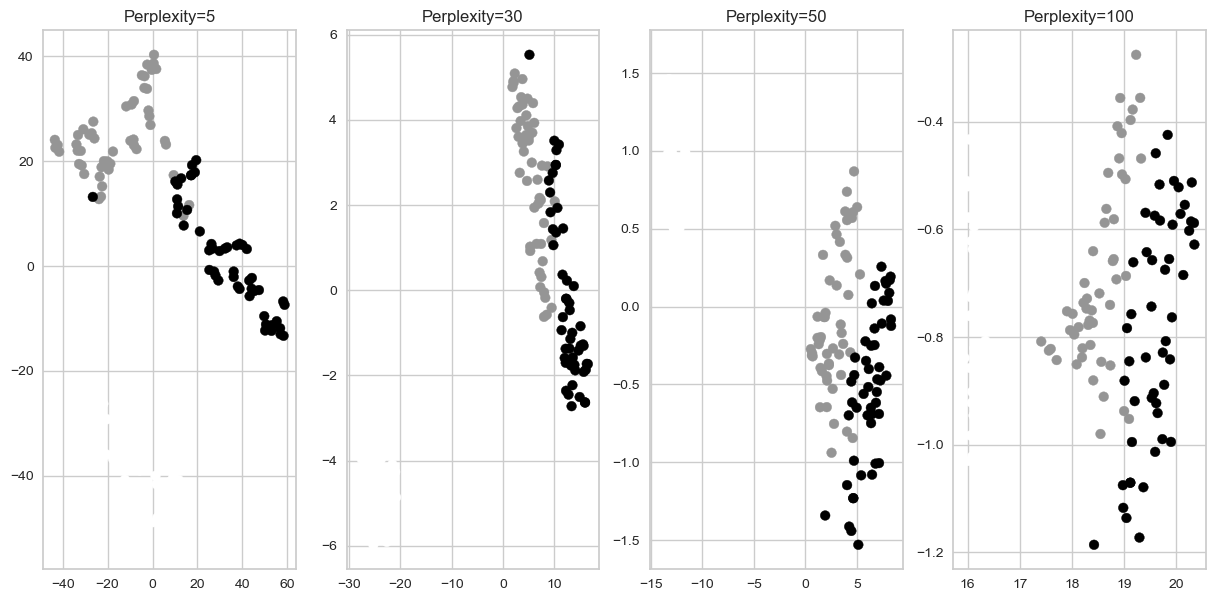

In [53]:
fig, ax = plt.subplots(1, 4, figsize=(15, 7))

for i,p in enumerate([5, 30, 50, 100]):
    
    tsne=TSNE(perplexity=p)
    
    x_emb=tsne.fit_transform(X)
    
    ax[i].scatter(x_emb[:,0], x_emb[:,1], c=y)
    ax[i].set_title('Perplexity={}'.format(p))
    
plt.show();

**UMAP - MNIST**

In [63]:
digitos=datasets.load_digits()

digitos.data.shape

(1797, 64)

In [67]:
digitos.data[300].reshape(8, 8)

array([[ 0.,  0.,  1., 11., 16., 16., 10.,  0.],
       [ 0.,  0., 13., 14.,  8., 12., 11.,  0.],
       [ 0.,  0.,  4.,  0.,  0., 13.,  4.,  0.],
       [ 0.,  0.,  0.,  0.,  3., 15.,  0.,  0.],
       [ 0.,  0.,  2., 15., 16., 16.,  9.,  0.],
       [ 0.,  0.,  3., 13., 16.,  8.,  1.,  0.],
       [ 0.,  0.,  0.,  7., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 13.,  3.,  0.,  0.,  0.]])

In [68]:
digitos.target[300]

7

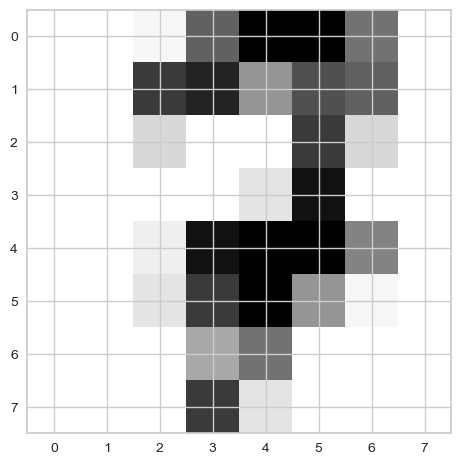

In [71]:
plt.imshow(digitos.data[300].reshape(8, 8));

In [72]:
import pandas as pd

import warnings
warnings.simplefilter('ignore')

from umap import UMAP

In [73]:
def get_umap(data, n):
    
    umap=UMAP(n_components=n)
    emb=umap.fit_transform(data)
    
    return pd.DataFrame(emb, columns=[f'emb_{i+1}' for i in range(n)])

In [74]:
umap_df = get_umap(digitos.data, 2)

umap_df.head()

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


,emb_1,emb_2
0,14.266570,8.142464
1,-7.254221,8.782586
2,-6.057849,10.068536
3,-0.111383,10.207716
4,8.580678,15.677140


In [77]:
digitos.data.shape

(1797, 64)

In [79]:
umap_df.shape

(1797, 2)

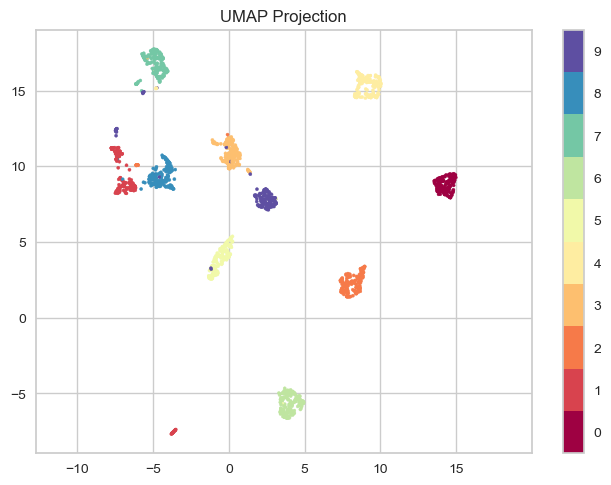

In [80]:
plt.scatter(umap_df.emb_1, 
            umap_df.emb_2, 
            c=digitos.target, 
            cmap='Spectral', 
            s=5)


plt.gca().set_aspect('equal', 'datalim')

plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))

plt.title('UMAP Projection');

**umap supervisado**

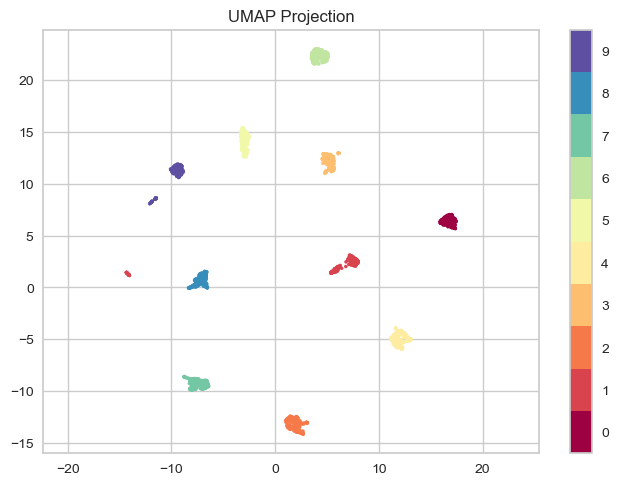

In [81]:
emb = UMAP().fit_transform(digitos.data, y=digitos.target)


umap_df=pd.DataFrame(emb, columns=['emb_1', 'emb_2'])


plt.scatter(umap_df.emb_1, umap_df.emb_2, c=digitos.target, cmap='Spectral', s=5)

plt.gca().set_aspect('equal', 'datalim')

plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))

plt.title('UMAP Projection');


In [93]:
umap_df[umap_df.emb_1<-14].head()

,emb_1,emb_2
442,-14.333297,1.434602
517,-14.096701,1.197944
527,-14.283141,1.384255
537,-14.285381,1.386068
558,-14.259578,1.360203


In [83]:
emb = UMAP().fit(digitos.data, y=digitos.target)

emb

UMAP(tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

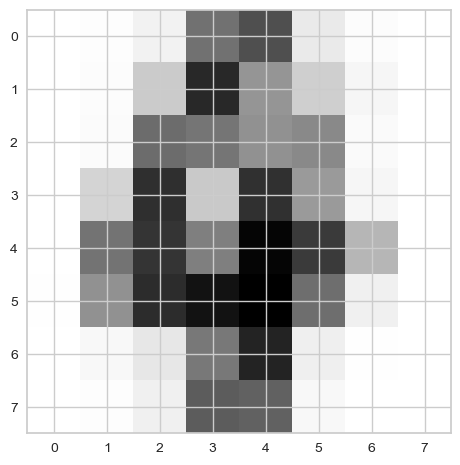

In [86]:
inverso = emb.inverse_transform([[3, -3]])

plt.imshow(inverso.reshape(8, 8));

**umap en moons y en blobs**

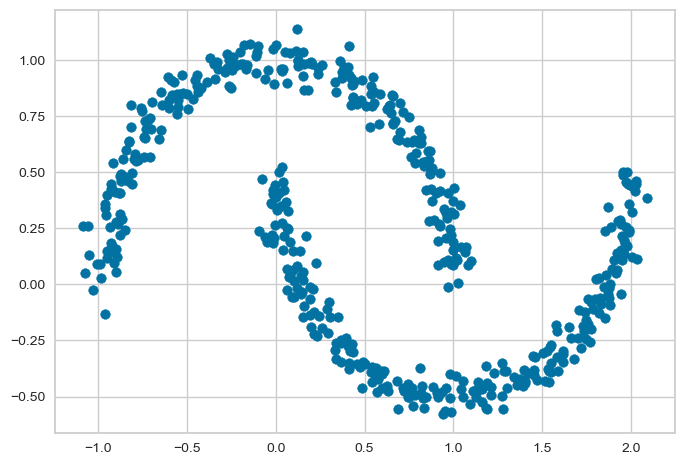

In [94]:
X,y=datasets.make_moons(n_samples=500, shuffle=True, noise=.05)

plt.scatter(X[:,0], X[:,1]);

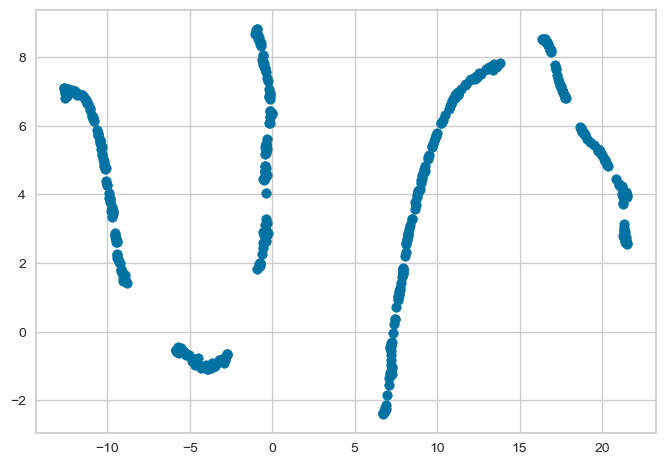

In [95]:
umap_df=get_umap(X, 2)

plt.scatter(umap_df.emb_1, umap_df.emb_2);

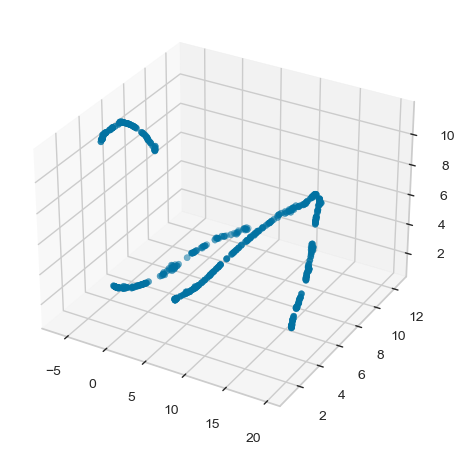

In [96]:
umap_df=get_umap(X, 3)

fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')

ax.scatter(umap_df.emb_1, umap_df.emb_2, umap_df.emb_3);

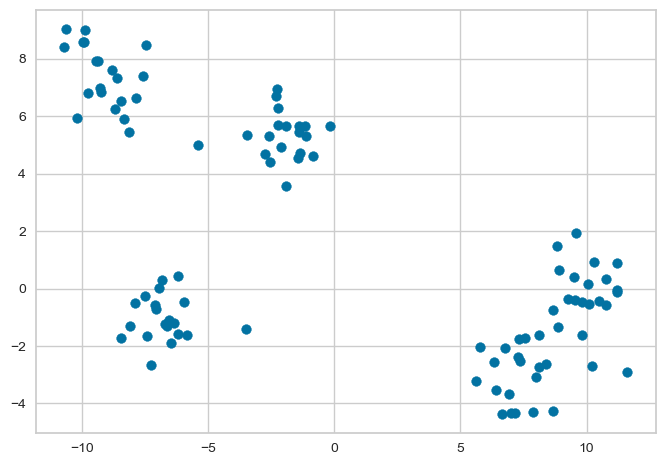

In [99]:
# blobs

X,y=datasets.make_blobs(n_features=8, centers=5)

plt.scatter(X[:,2], X[:,1]);

In [98]:
X.shape

(100, 8)

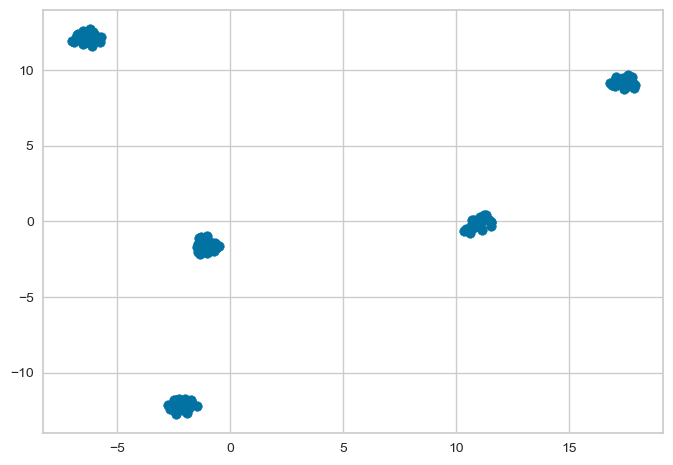

In [100]:
umap_df=get_umap(X, 2)

plt.scatter(umap_df.emb_1, umap_df.emb_2);

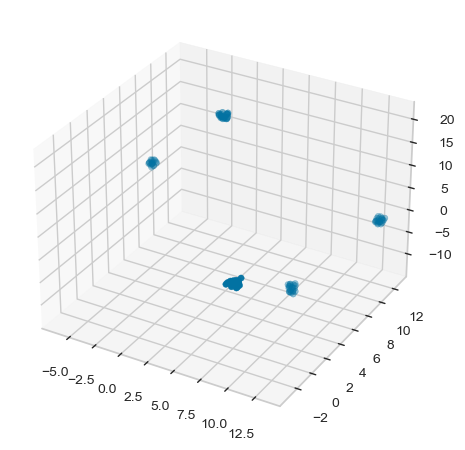

In [101]:
umap_df=get_umap(X, 3)

fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')

ax.scatter(umap_df.emb_1, umap_df.emb_2, umap_df.emb_3);

In [102]:
from sklearn.cluster import DBSCAN

In [103]:
dbscan=DBSCAN()

pred=dbscan.fit(umap_df).labels_

In [104]:
pred

array([0, 1, 2, 1, 2, 3, 2, 0, 0, 2, 4, 1, 0, 2, 0, 4, 2, 4, 3, 2, 4, 3,
       1, 2, 4, 1, 0, 2, 1, 1, 0, 1, 2, 3, 3, 0, 4, 3, 4, 3, 4, 1, 0, 4,
       0, 3, 3, 3, 4, 4, 0, 0, 1, 0, 4, 4, 1, 3, 4, 2, 3, 0, 2, 1, 3, 2,
       2, 2, 4, 1, 3, 1, 3, 0, 1, 0, 0, 1, 1, 4, 0, 1, 1, 4, 2, 4, 3, 3,
       2, 0, 4, 3, 4, 2, 3, 2, 2, 3, 1, 0])

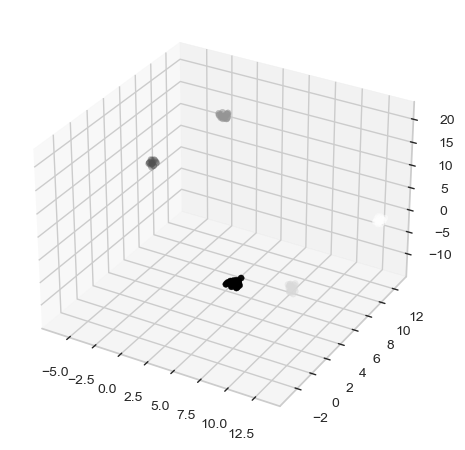

In [105]:
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')

ax.scatter(umap_df.emb_1, umap_df.emb_2, umap_df.emb_3, c=pred);

In [106]:
ars(y, pred)

1.0

https://towardsdatascience.com/how-to-evaluate-unsupervised-learning-models-3aa85bd98aa2


https://towardsdatascience.com/evaluating-goodness-of-clustering-for-unsupervised-learning-case-ccebcfd1d4f1